<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Homework02_FirstMachineLearningExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: First Machine Learning Example

This homework assignment aims to build a linear model to describe the trend of height increase for the United Kingdom between 1900 and 1980.

**Please complete this notebook and submit it to Blackboard as a PDF file before Wednesday, Sep. 21 at 11:59PM.**






In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# automatically loads figures in the notebook
%matplotlib inline

In [2]:
# dark theme for matplotlib figures
plt.style.use(["dark_background"])

In [3]:
# increase the scale of matplotlib figures
mpl.rcParams['figure.dpi'] = mpl.rcParamsDefault['figure.dpi'] * 1.2

1. Extract the average height values for **United Kingdom** between 1900 and 1980 from the dataset used in Week 2 notebook.

In [4]:
# load the data set
df = pd.read_csv("data/average_height_of_men_by_country.csv")

In [5]:
# check the data frame
df[-3:]

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1247,Zimbabwe,ZWE,1960,171.1
1248,Zimbabwe,ZWE,1970,171.3
1249,Zimbabwe,ZWE,1980,171.0


In [6]:
# check the data type of the columns
df.dtypes

Entity                                            object
Code                                              object
Year                                               int64
Human Height (University of Tuebingen (2015))    float64
dtype: object

In [7]:
# extract the average height values for the United Kingdom between 1900 and 1980
uk_data = df[(df["Entity"] == "United Kingdom") & (df["Year"] >= 1900) & (df["Year"] <= 1980)]

In [8]:
# clean the data frame
uk_data = uk_data.rename(columns = {"Year":"year", "Human Height (University of Tuebingen (2015))": "height(cm)"})
uk_data.drop(["Entity", "Code"], axis=1, inplace=True)

In [9]:
# display the clean data frame
uk_data

,year,height(cm)
1185,1900,169.4
1186,1910,170.9
1187,1920,171.0
1188,1930,173.9
1189,1940,174.9
1190,1950,176.0
1191,1960,176.9
1192,1970,177.1
1193,1980,176.8


2. Find a linear model (height = m * year + b) that can describe the trend of height increase.
    - The value of `m` should be close to the average height increase
    - The value of `b` should make the line close to the data points.
    - Use the `LinearRegression` class from `sklearn.linear_model` for this task

Quirk of the `LinearRegression()` class: the `fit(training_data, target_values)` method expects:
- `training_data` to be a 2D array (or a matrix)
- `target_data` to be a 1D array

In [10]:
linear_model = LinearRegression().fit(uk_data[["year"]], uk_data["height(cm)"])

Get the predictions using the `training_data` as samples

In [11]:
linear_model_height_predictions = linear_model.predict(uk_data[["year"]])

3. Display the model line together with the data points.

Text(0, 0.5, 'Height (cm)')

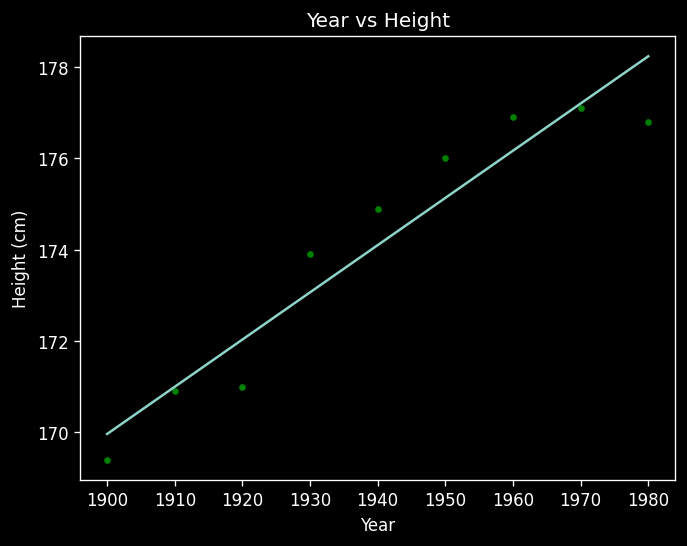

In [12]:
plt.plot(uk_data["year"], uk_data["height(cm)"], "g.")
plt.plot(uk_data["year"], linear_model_height_predictions)
plt.title("Year vs Height")
plt.xlabel("Year")
plt.ylabel("Height (cm)")

---

Reproduce the same results as above but step by step.

In [13]:
m = linear_model.coef_[0]
b = linear_model.intercept_
print(f"m = {m:0.3f}\nb = {b:0.3f}")

m = 0.103
b = -26.690


In [14]:
# calculate two points on the line
x_coordinates = [1900, 1980]
y_coordinates = [m * year + b for year in x_coordinates]
y_coordinates

[169.96, 178.23999999999998]

Text(0, 0.5, 'Height (cm)')

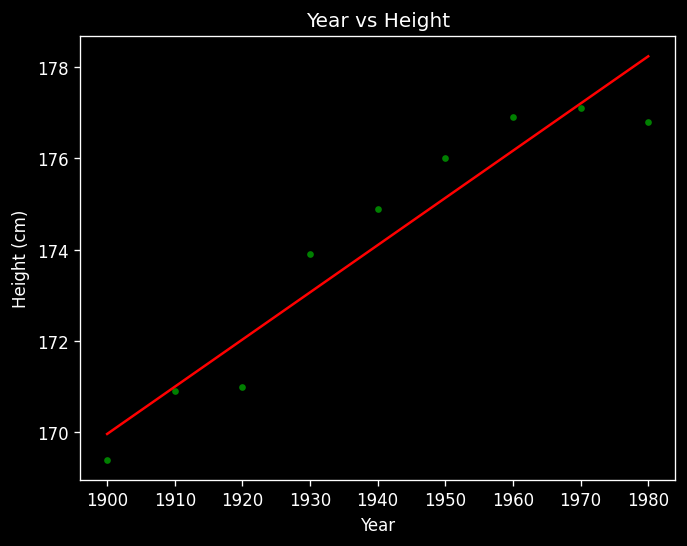

In [15]:
plt.plot(uk_data["year"], uk_data["height(cm)"], "g.")
plt.plot(x_coordinates, y_coordinates, "r-")
plt.title("Year vs Height")
plt.xlabel("Year")
plt.ylabel("Height (cm)")

4. Compute the mean square error (MSE) of this model. 

In [16]:
# compare the actual values against the predicted values
mean_squared_error(uk_data["height(cm)"], linear_model_height_predictions)

0.6762777777777765

---

Reproduce the same results above but step by step.

In [17]:
uk_data = uk_data.set_index("year")

In [18]:
# print the red model's error on every year
msq = 0
for year in uk_data.index:
    error = m * year + b - uk_data.loc[year, "height(cm)"]
    msq += abs(error) ** 2
    print("{}     {:.4f}".format(year, error))

1900     0.5600
1910     0.0950
1920     1.0300
1930     -0.8350
1940     -0.8000
1950     -0.8650
1960     -0.7300
1970     0.1050
1980     1.4400


In [19]:
print(f"mean square error: {msq / len(uk_data)}")

mean square error: 0.6762777777777765
